# Second-Phase-Evaluation-Projects--1-

# Loan Application Status Prediction

# Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


# 1. Importing Libraries

In [1]:
# Data Analyse & Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Preprocessor, Outlier remover, Scaler, Sampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Metrics & Model Selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score, roc_curve

#Prevent WARNINGS!
import warnings
warnings.filterwarnings('ignore')

# 2.Importing Dataset

In [2]:
df = pd.read_csv('C:/Users/Sayan Mondal/Downloads/loan_prediction (1).csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# 3.Extraplotary Data Analysis

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
df.shape

(614, 13)

In [12]:
df.duplicated().sum()

0

In [13]:
df.isin([' ','NaN','-']).sum().any()

False

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in column {col}: {unique_values}")

Unique values in column Loan_ID: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001

In [3]:
#Exploring Categorical Column before filling Missing Values
cat_col =['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']

for i in cat_col:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Gender
Male      489
Female    112
Name: Gender, dtype: int64
Married
Yes    398
No     213
Name: Married, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64


Thus the data a bit skewed also has few outliers after treating them data shall be best for modelling

# 4. Data Visualization

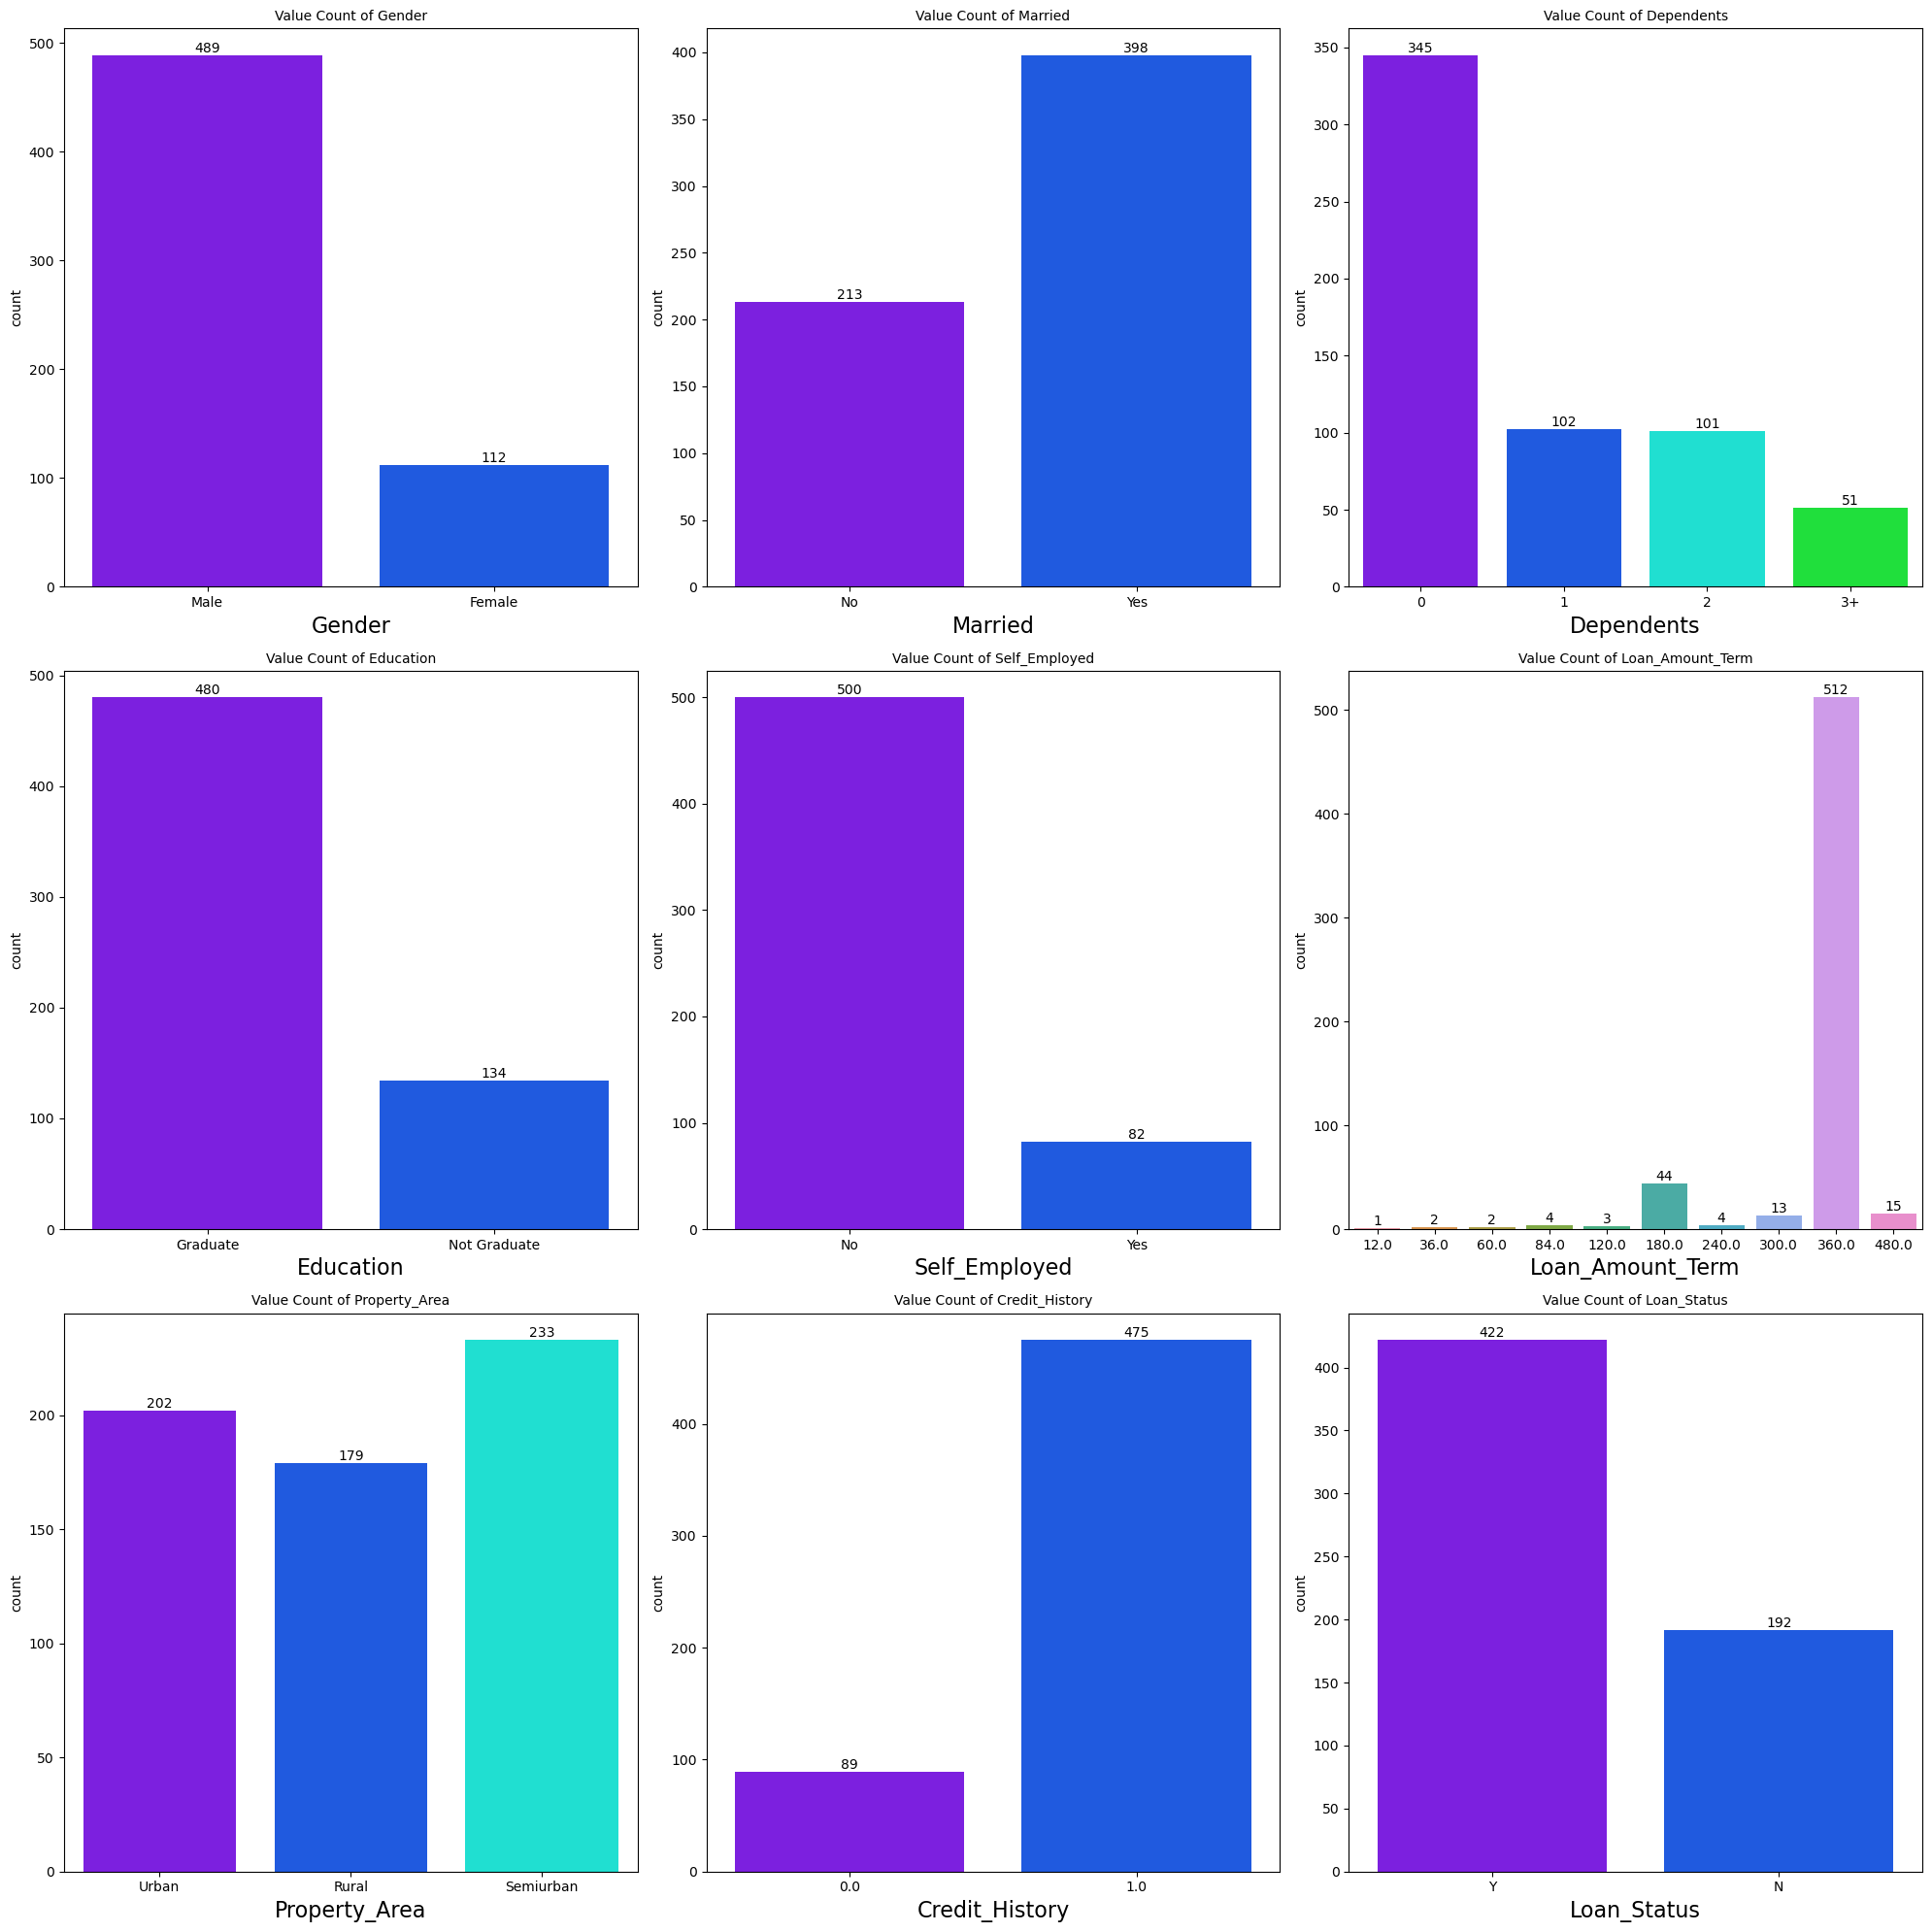

In [17]:
#visualizing it
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20))
plotnumber=1

#Creating CountPlot
for i, column in enumerate(cat_col):
    if plotnumber <= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.countplot(x=column, data=df)
        for container in ax.containers:
            ax.bar_label(container)
        plt.xlabel(column, fontsize=16)
        ax.set_title(f'Value Count of {column}', fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: >

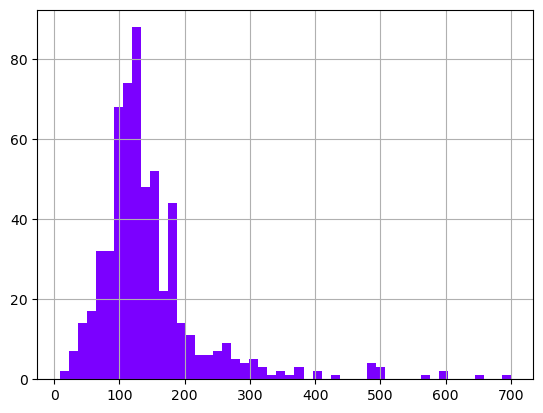

In [18]:
df['LoanAmount'].hist(bins=50)

Gender
Married
Dependents
Education
Self_Employed
Loan_Amount_Term
Property_Area
Credit_History
Loan_Status


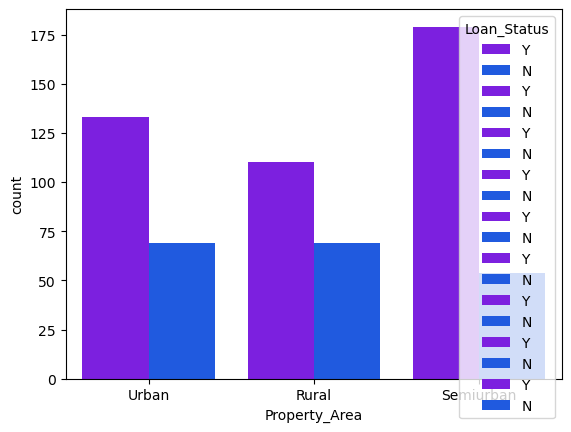

In [19]:
#Exploring Categorical Column before filling Missing Values
cat_col =['Gender','Married','Dependents','Education','Self_Employed',
          'Loan_Amount_Term','Property_Area','Credit_History','Loan_Status']

for i in cat_col:
    print(i)
    sns.countplot(x='Property_Area',hue='Loan_Status',data=df)
    

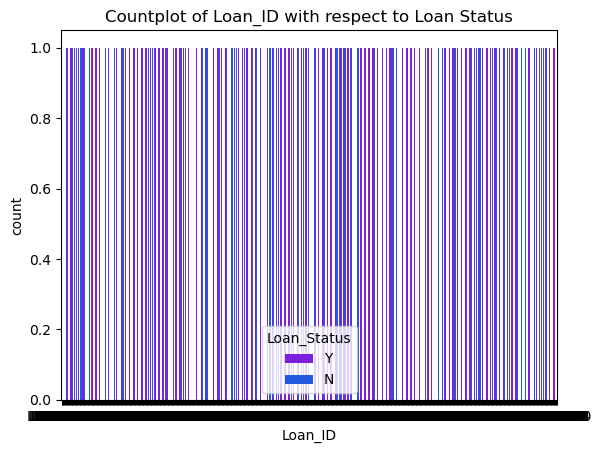

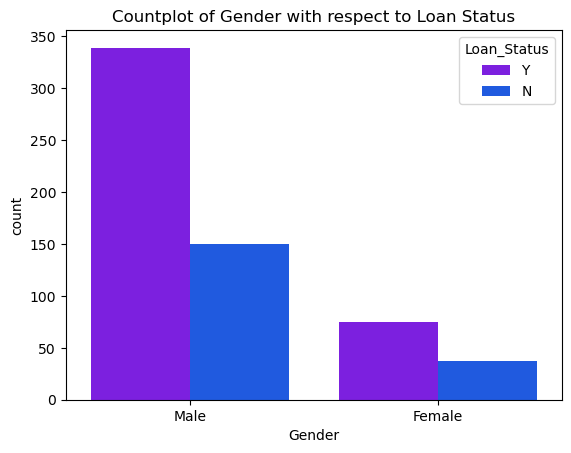

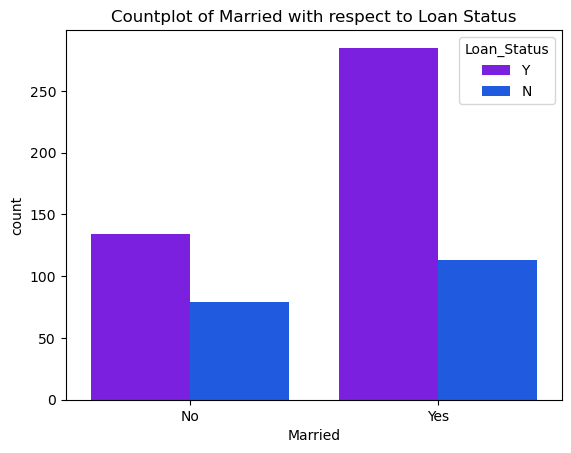

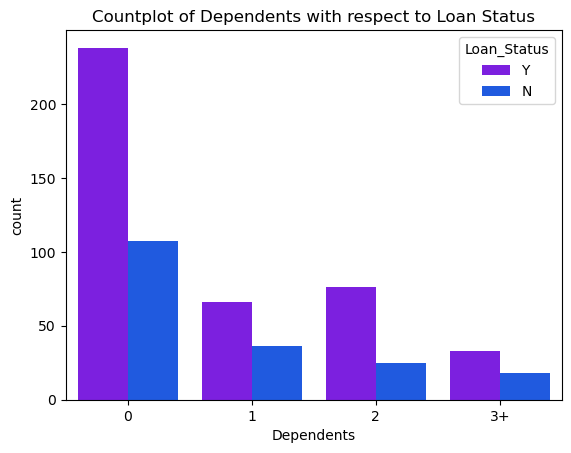

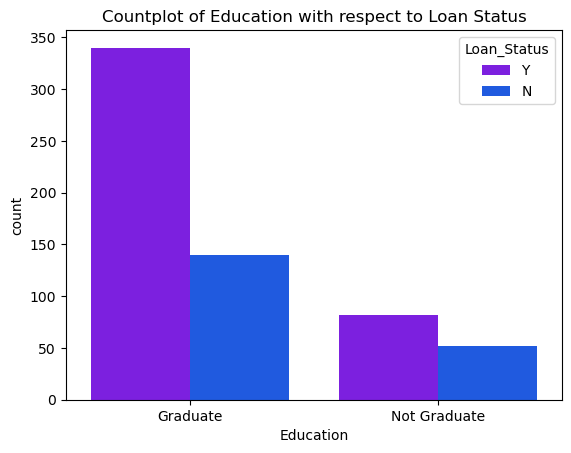

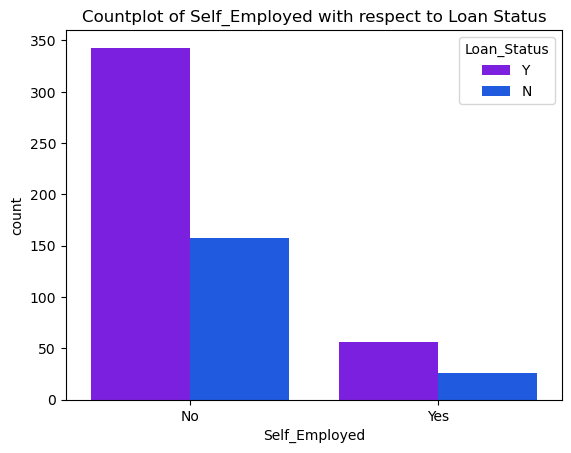

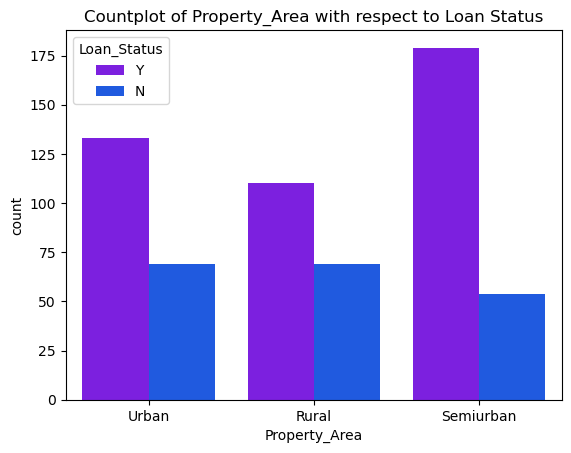

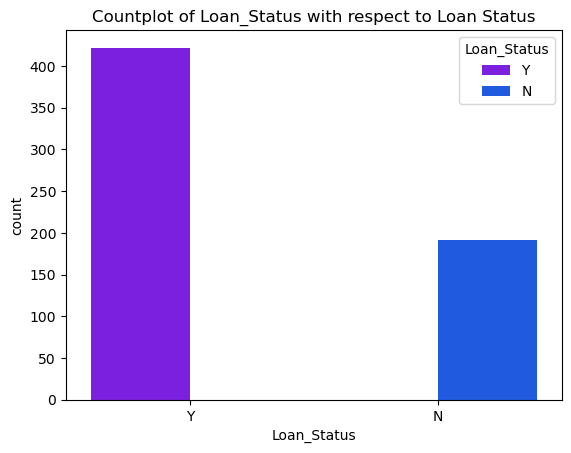

In [20]:
# Iterate through categorical columns and create countplots
for col in df.select_dtypes(include=['object']):
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f"Countplot of {col} with respect to Loan Status")
    plt.show()

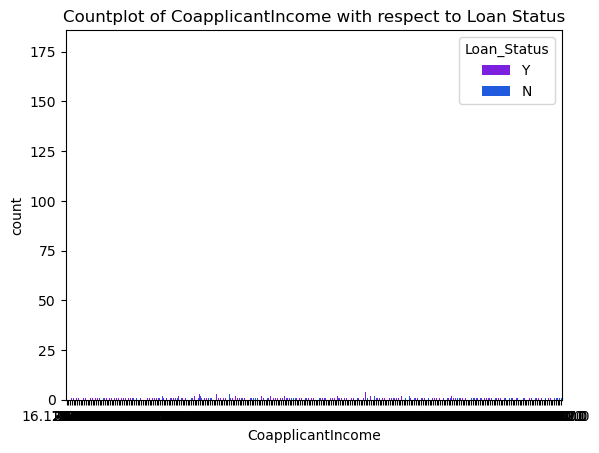

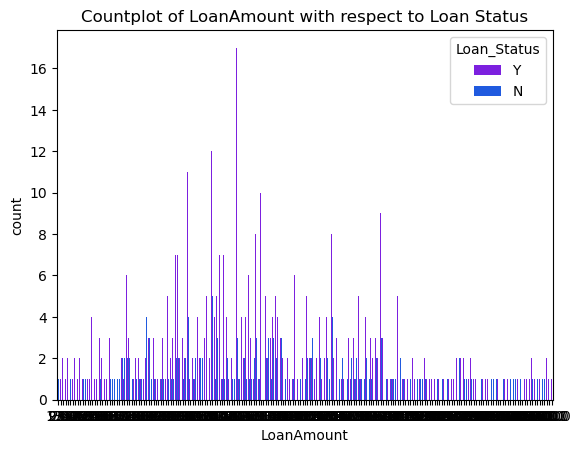

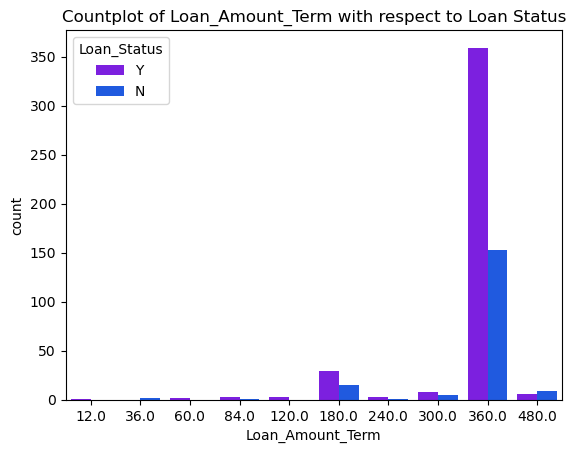

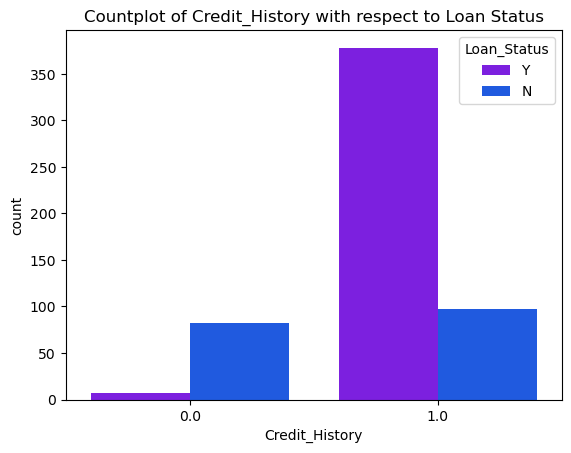

In [21]:
# Iterate through categorical columns and create countplots
for col in df.select_dtypes(include=['float64']):
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f"Countplot of {col} with respect to Loan Status")
    plt.show()

In [4]:
#Dropping column
df = df.drop("Loan_ID", axis=1)
df.shape

(614, 12)

# Handling Missing Or Null Values

In [5]:
# Imputating Missing value with mode for categorical features
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
# Imputation of Numerical features
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
#checking missing values after imputation
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                   Missing Values  % Missing data
Gender                          0             0.0
Married                         0             0.0
Dependents                      0             0.0
Education                       0             0.0
Self_Employed                   0             0.0
ApplicantIncome                 0             0.0
CoapplicantIncome               0             0.0
LoanAmount                      0             0.0
Loan_Amount_Term                0             0.0
Credit_History                  0             0.0
Property_Area                   0             0.0
Loan_Status                     0             0.0


# Label Encoding

In [6]:
#Initiating Label Encoder
le = LabelEncoder()
for i in cat_col:
    df[i] = le.fit_transform(df[i])

#Encoding our target column
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

# Feature Engineering

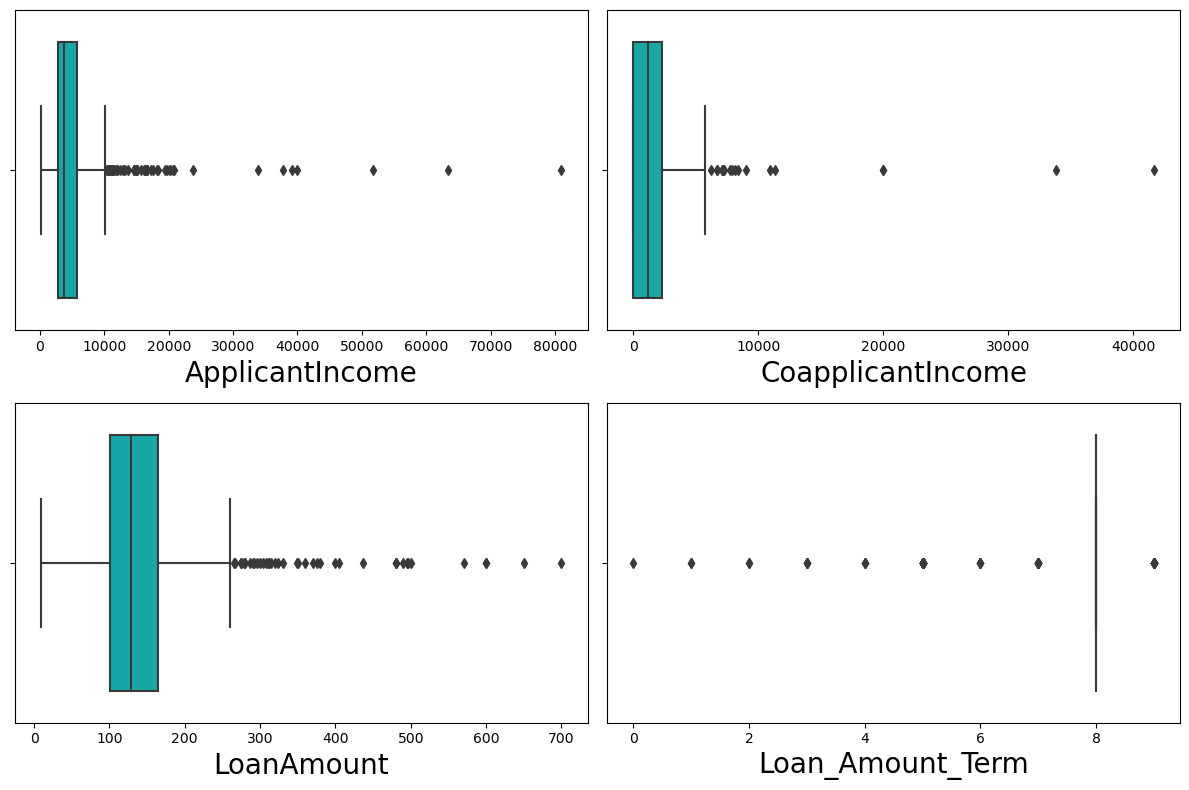

In [25]:
outliers =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(12,8))
plotnumber=1
for column in outliers:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(x=df[column],color='c')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [7]:
#Removing Outliers
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)
# reassigning the changed dataframe name to our original dataframe name
df=df1.copy()

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (577, 12)
Percentage of data loss post outlier removal:  6.026058631921824


# Skewness

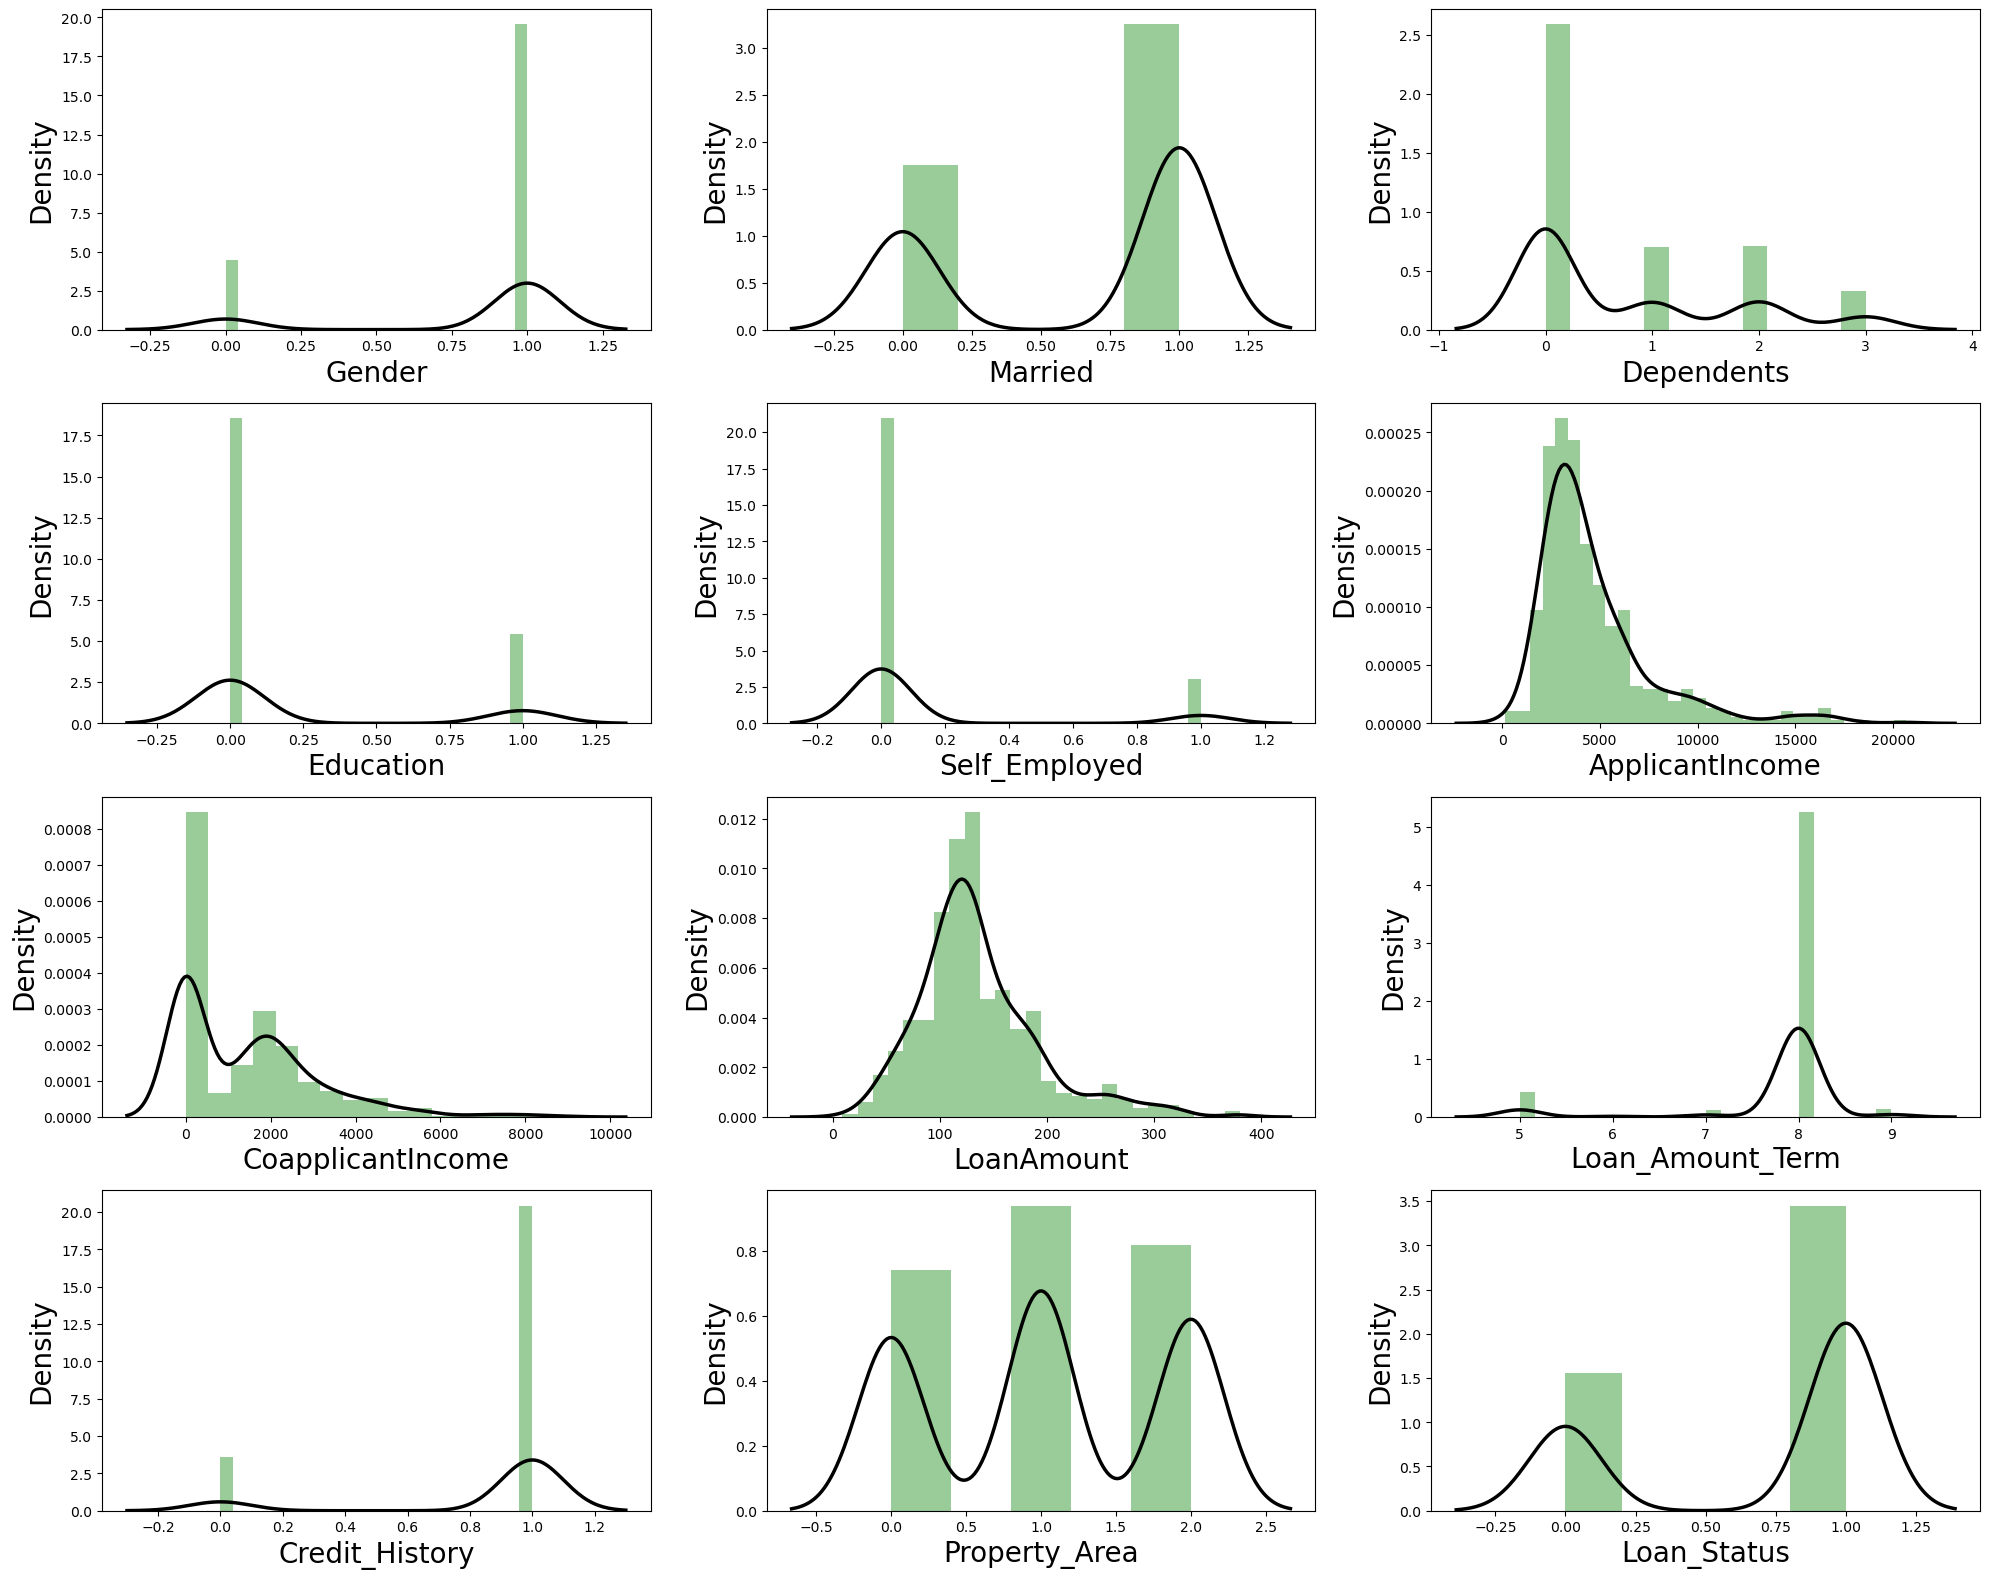

In [27]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber= 1

for column in df.columns:
    if plotnumber<=26:
        ax= plt.subplot(9,3, plotnumber)
        sns.distplot(df[column], color='green',kde_kws={"color": "k", "lw": 2.5, "label": "KDE"})
        plt.xlabel(column, fontsize= 20)
        plt.ylabel('Density', fontsize= 20)
    plotnumber+=1
plt.tight_layout()

In [28]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.818252
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [8]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
#Initating Scaler
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)
df[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [9]:
df.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.818252
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Correlation of Target Variable With Other Features

In [10]:
#correlation with target column
correlation_with_target = df.corr()['Loan_Status'].abs().sort_values(ascending=False)
print(correlation_with_target)

Loan_Status          1.000000
Credit_History       0.560936
Education            0.092658
Married              0.089026
CoapplicantIncome    0.079344
Self_Employed        0.026525
Property_Area        0.026507
LoanAmount           0.023609
Dependents           0.017872
Gender               0.017408
ApplicantIncome      0.002484
Loan_Amount_Term     0.000088
Name: Loan_Status, dtype: float64


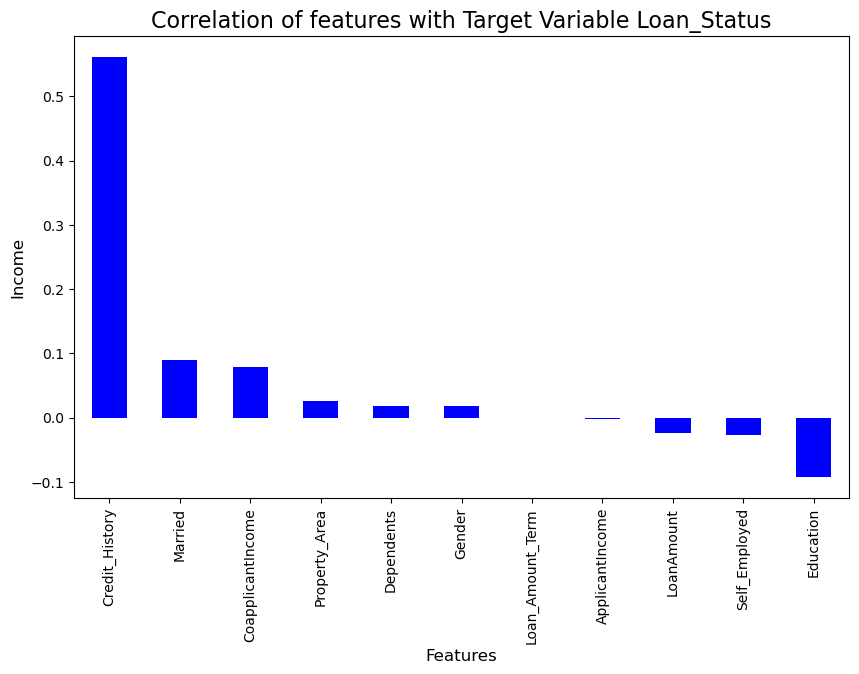

In [32]:
plt.figure(figsize = (10,6))
df.corr()['Loan_Status'].drop(['Loan_Status']).sort_values(ascending=False).plot(kind='bar',color = 'blue')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Income',fontsize=12)
plt.title('Correlation of features with Target Variable Loan_Status',fontsize = 16)
plt.show()

In [11]:
# Dropping the column which has least correlation with target
df.drop(columns=['Loan_Amount_Term', 'ApplicantIncome'], inplace=True)
df.shape

(577, 10)

# Using Variance_Influence_Factor finding Multicollinearity

In [12]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,5.101363,Gender
1,3.920692,Married
2,1.776292,Dependents
3,1.313801,Education
4,1.161673,Self_Employed
5,1.197988,CoapplicantIncome
6,1.136072,LoanAmount
7,7.296006,Credit_History
8,2.418983,Property_Area
9,4.811789,Loan_Status


# Splitting Data for modelling

In [13]:
# Splitting data in target and dependent feature
X = df.drop(['Loan_Status'], axis =1)
Y = df['Loan_Status']

In [14]:
X.shape, Y.shape

((577, 9), (577,))

In [15]:
Y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [16]:
# Balancing Imbalance data using oversampling method SMOTE

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [17]:
Y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Feature Engineering

In [18]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Model Selection

In [41]:
# Initialize all the classification models
LR_model = LogisticRegression()
DT_model = DecisionTreeClassifier()
SV_model = SVC()
KNR_model = KNeighborsClassifier()
RFR_model = RandomForestClassifier()
GNB_model = GaussianNB()
ET_model = ExtraTreesClassifier()

# Create a list of models for iteration
classification_models = [
    (LR_model, "Logistic Regression"),
    (DT_model, "Decision Tree Classifier"),
    (SV_model, "Support Vector Classifier"),
    (KNR_model, "K-Neighbors Classifier"),
    (RFR_model, "Random Forest Classifier"),
    (GNB_model, "GaussianNB"),
    (ET_model, "ExtraTrees Classifier"),
]

# List to store model performance dictionaries
model_performances = []

# Iterate over the models and evaluate them using cross-validation
for model, model_name in classification_models:
    best_random_state = 0
    best_accuracy = 0
    
    for random_state in range(1, 101):  # Try different random states
        cross_val_scores = cross_val_score(model, X, Y, cv=5)
        mean_accuracy = np.mean(cross_val_scores)

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = random_state

    # Now, calculate the model's performance metrics using the best random state
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=best_random_state)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred, output_dict=True)

    precision = classification_rep['weighted avg']['precision']
    recall = classification_rep['weighted avg']['recall']
    f1_score = classification_rep['weighted avg']['f1-score']
    support = classification_rep['weighted avg']['support']

    model_performance = {
        "Model": model_name,
        "Best Random State": best_random_state,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score,
        "Support": support,
        "Confusion Matrix": [conf_matrix.tolist()]
    }

    model_performances.append(model_performance)

# Create a DataFrame from the model performance list
model_performance_df = pd.DataFrame(model_performances)

# Sort the models by accuracy in descending order
model_performance_df = model_performance_df.sort_values(by="Accuracy", ascending=False)
model_performance_df

,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
4,Random Forest Classifier,78,0.861925,0.861858,0.861925,0.861876,239.0,"[[[93, 17], [16, 113]]]"
6,ExtraTrees Classifier,78,0.836820,0.837954,0.836820,0.837021,239.0,"[[[93, 17], [22, 107]]]"
0,Logistic Regression,78,0.820084,0.843506,0.820084,0.814410,239.0,"[[[72, 38], [5, 124]]]"
2,Support Vector Classifier,78,0.815900,0.824510,0.815900,0.812904,239.0,"[[[77, 33], [11, 118]]]"
1,Decision Tree Classifier,78,0.807531,0.810965,0.807531,0.807835,239.0,"[[[92, 18], [28, 101]]]"
5,GaussianNB,10,0.803347,0.840659,0.803347,0.794648,239.0,"[[[67, 44], [3, 125]]]"
3,K-Neighbors Classifier,56,0.799163,0.799864,0.799163,0.799290,239.0,"[[[100, 26], [22, 91]]]"


In [43]:
print("The TOP 3 Performing BEST Regression MODEl are")
model_performance_df.head(3)

The TOP 3 Performing BEST Regression MODEl are


,Model,Best Random State,Accuracy,Precision,Recall,F1-Score,Support,Confusion Matrix
4,Random Forest Classifier,78,0.861925,0.861858,0.861925,0.861876,239.0,"[[[93, 17], [16, 113]]]"
6,ExtraTrees Classifier,78,0.836820,0.837954,0.836820,0.837021,239.0,"[[[93, 17], [22, 107]]]"
0,Logistic Regression,78,0.820084,0.843506,0.820084,0.814410,239.0,"[[[72, 38], [5, 124]]]"


Random Forest Classifier is choosen as although more or less all the top models scored closely but the acuracy score is higher for the selected with random state as 78

# Hyperparameter Tuning

Accuracy: 0.83125
Confusion Matrix:
 [[60 14]
 [13 73]]


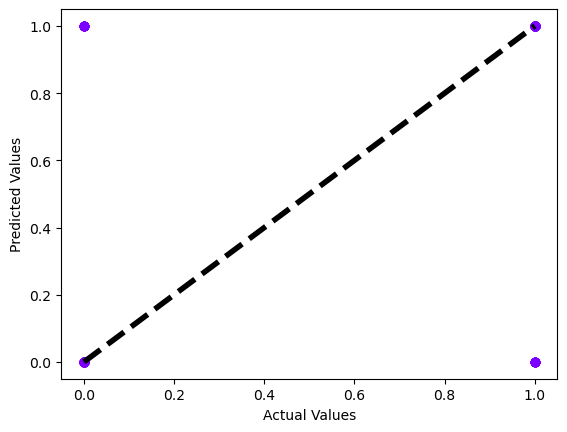

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Load your dataset and split it into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=78)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and build the optimized classifier
best_params = grid_search.best_params_
optimized_clf = RandomForestClassifier(**best_params)

# Fit the optimized classifier on the training data
optimized_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = optimized_clf.predict(X_test)

# Calculate accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the accuracy score and confusion matrix
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n {confusion_mat}')

# Visualize the predicted and actual values
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
plt.show()


Accuracy: 0.4


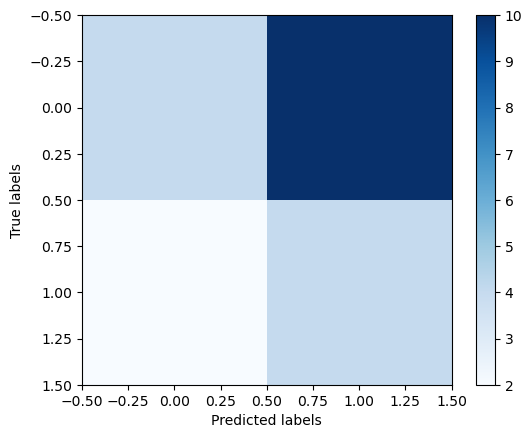

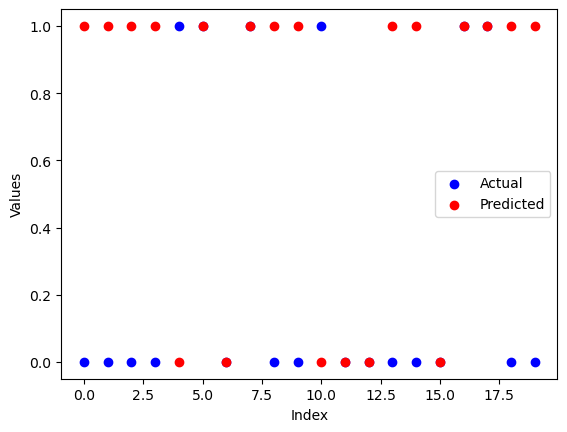

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Generate some random data for demonstration
X = np.random.rand(100, 10)
y = np.random.randint(0, 2, 100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Initialize the Extra Trees classifier
model = ExtraTreesClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 8]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
confusion = confusion_matrix(y_test, y_pred)
plt.imshow(confusion, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Plot predicted vs. actual values
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="red", label="Predicted")
plt.legend()
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()


Accuracy: 0.6


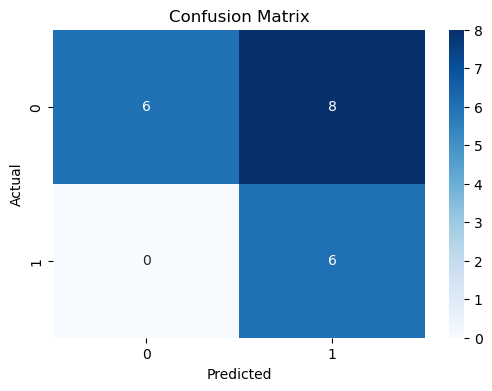

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

# Create a logistic regression model
model = LogisticRegression()

# Set up a list of hyperparameter values to tune
hyperparameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use grid search to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(model, hyperparameters, cv=5)
gridsearch.fit(X_train, y_train)

# Obtain the best hyperparameters
best_C = gridsearch.best_params_['C']

# Train the logistic regression model with the best hyperparameters
model = LogisticRegression(C=best_C)
model.fit(X_train, y_train)

# Predict the target variable using the trained model
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


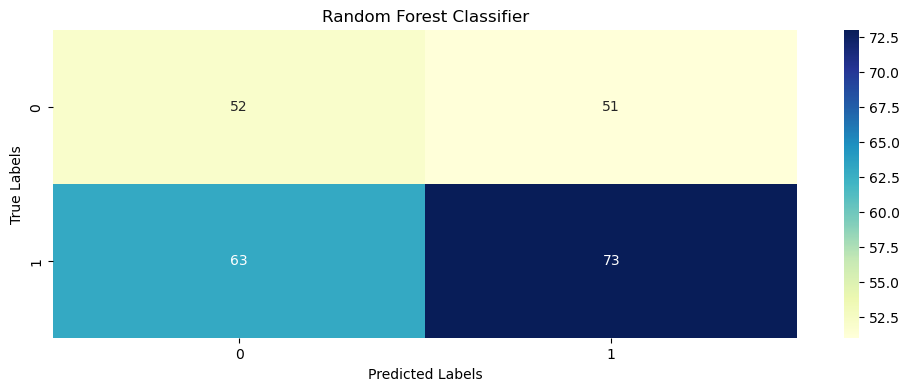

In [51]:
cm_rf = confusion_matrix(Y_test, Y_pred)

# Create subplots for the confusion matrices
fig, axes = plt.subplots(figsize=(12, 4))

# Plot Random Forest Classifier Confusion Matrix
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="YlGnBu", ax=axes)
axes.set_title('Random Forest Classifier')
axes.set_xlabel('Predicted Labels')
axes.set_ylabel('True Labels')

plt.show()


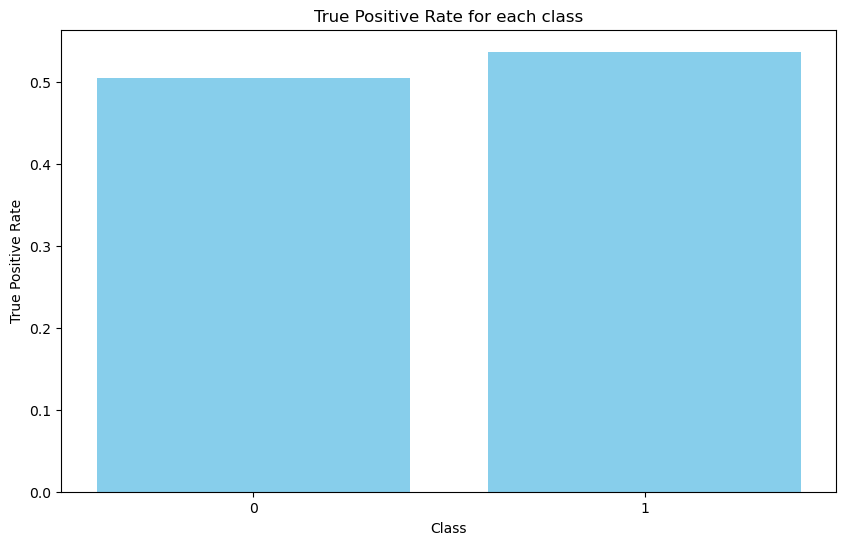

In [52]:
# Calculate true positive rate for each class
tp_rate = np.diag(cm_rf) / np.sum(cm_rf, axis=1)

# Create bar plot for true positive rate
plt.figure(figsize=(10, 6))
plt.bar(range(len(tp_rate)), tp_rate, color='skyblue')
plt.xticks(range(len(tp_rate)))
plt.xlabel('Class')
plt.ylabel('True Positive Rate')
plt.title('True Positive Rate for each class')
plt.show()


# SAVING BEST MODEL

In [57]:
import pickle

filename = 'LoanStatus_model.pkl'
pickle.dump(optimized_clf, open(filename, 'wb'))